Methods of collecting various Internet resources are implemented as a set of containers managed by a centralized service, called a process manager. 

The process manager provides the user with an external API for setting tasks and working with data. The set of tasks that solve the requirements facing the analyst is called a process. 

All tasks available in the process, except for synchronous tasks (for example, translating a short snippet) in order of priority are transferred to the task manager, who performs their decomposition into minimal operations and distributes them across the computing cluster in accordance with available resources. At the same time, the task manager creates workers responsible for completing the corresponding task and implemented as docker containers. Worker results are saved to the MongoDB database.

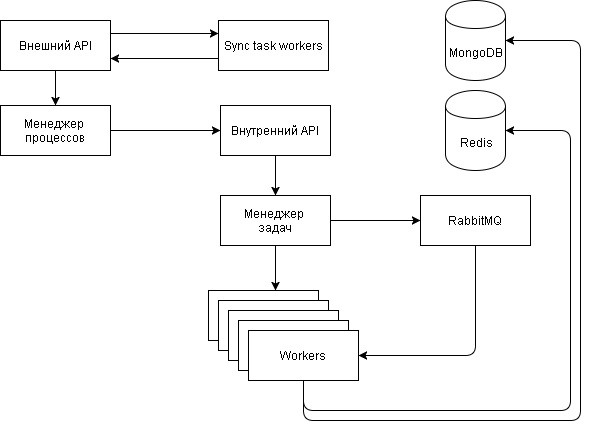

In [ ]:
# api description
http://192.168.135.23:9084/api/crawl/#post-apiv1crawlvk

In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pymongo import MongoClient
from bson.objectid import ObjectId
import json
from datetime import datetime
import time, sys
import requests

In [5]:
mongoItemsClient = MongoClient("mongodb://192.168.135.21:27017/");
mongoItemsDatabaseClient = mongoItemsClient["HSE_MAGOLEGO_2020"];
#col = mongoItemsDatabaseClient["Posts"]
col = mongoItemsDatabaseClient["Users"]

In [32]:
users_list = ["VK_97803804",
"VK_73555158",
"VK_155630933",
"labra",
"mitrofanova12",
"VK_98950709",
"VK_321512099",
"dima_kozyrev",
"anton_rigin",
"hier_babuena_y_canela",
"dashasakulina",
"d_leontieva",
"alex_sabelnikov",
"svetlna.levi"]

In [33]:
payload = {
            "mongo_server_name": "mongodb://192.168.135.21:27017/",
            "mongo_database_name": "HSE_MAGOLEGO_2020",
            "mongo_collection_name": "Users",
            "workflow_id": 2020041701,
            "app_settings": {
                "workers_count": 1,
                "rabbit_notifications": True,
                "autodelete": True,
                "log": {
                    "loggers": [
                        "console"
                    ],
                    "log_level": "debug",
                    "level": "debug"
                },
                "image_tag": "latest"
            },
            "objects": users_list,
            "priority": 5,
            "task_type": "1",
            "options": {
                "count":10000
            }
        }

In [34]:
res = requests.post("http://192.168.135.23:8084/api/v1/crawl/VK", json = payload)
print(res)
print(res.content)
res_json = json.loads(res.content.decode("utf-8"))
res_json["crawl_id"]

<Response [200]>
b'{"crawl_id":"VK-1587074695673006","url":"http:\\/\\/192.168.135.23:8084\\/api\\/v1\\/crawl\\/VK-1587074695673006","input_url":"http:\\/\\/192.168.135.23:8084\\/api\\/v1\\/crawl\\/VK-1587074695673006\\/input","errors_url":"http:\\/\\/192.168.135.23:8084\\/api\\/v1\\/crawl\\/VK-1587074695673006\\/errors","rabbit_notifications":{"host":"192.168.135.21:5672","password":"test","queue":"staging_crawl_notifications_VK-1587074695673006","username":"test"}}'


In [81]:
while True:
    if col.count_documents({"CrawlId":res_json["crawl_id"]}) == 0:
        time.sleep(500)
    else:
        break
        
cursor = col.aggregate([
    {"$project":{"ID":1,
                "ScreenName":1,
                }},
    
])
df =  pd.DataFrame(list(cursor))
df

,ID,ScreenName,_id
0,VK_97803804,97803804,5e98d6cbc9d53f00086616e8
1,VK_73555158,73555158,5e98d6cbc9d53f00086616ea
2,VK_155630933,155630933,5e98d6cbc9d53f00086616ec
3,VK_65606427,labra,5e98d6cbc9d53f00086616ed
4,VK_15173617,mitrofanova12,5e98d6cbc9d53f00086616ee
5,VK_98950709,98950709,5e98d6cbc9d53f00086616f0
6,VK_321512099,321512099,5e98d6cbc9d53f00086616f2
7,VK_82512790,dima_kozyrev,5e98d6cbc9d53f00086616f3
8,VK_52439149,anton_rigin,5e98d6cbc9d53f00086616f4
9,VK_20091008,hier_babuena_y_canela,5e98d6cbc9d53f00086616f5


`_id` - первичный ключ записи. Это обязательное поле, возвращаемое mongodb, удалим его.

In [82]:
del df["_id"]

In [83]:
df

,ID,ScreenName
0,VK_97803804,97803804
1,VK_73555158,73555158
2,VK_155630933,155630933
3,VK_65606427,labra
4,VK_15173617,mitrofanova12
5,VK_98950709,98950709
6,VK_321512099,321512099
7,VK_82512790,dima_kozyrev
8,VK_52439149,anton_rigin
9,VK_20091008,hier_babuena_y_canela


In [9]:
friends_payload = {
            "mongo_server_name": "mongodb://192.168.135.21:27017/",
            "mongo_database_name": "HSE_MAGOLEGO_2020",
            "mongo_collection_name": "Users",
            "workflow_id": 2020041702,
            "app_settings": {
                "workers_count": 10,
                "rabbit_notifications": True,
                "autodelete": True,
                "log": {
                    "loggers": [
                        "console"
                    ],
                    "log_level": "debug",
                    "level": "debug"
                },
                "image_tag": "latest"
            },
            "objects": df['ID'].tolist(),
            "priority": 5,
            "task_type": "4",
            "options": {
                "need_likes" : 1,
                "count":10000
            }
        }
res = requests.post("http://192.168.135.23:8084/api/v1/crawl/VK", json = friends_payload)
print(res)
#print(res.content)
res_json = json.loads(res.content.decode("utf-8"))
res_json["crawl_id"]

<Response [200]>


'VK-1587121859473011'

In [85]:
# df.to_csv('range_1_ids.tsv',sep = '\t')
# df = pd.read_csv('range_1_ids.tsv',sep = '\t')